In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../")
from legendre_fenchel import legendre_fenchel

In [3]:
def c_transform(x, phi, p):
    """costが c(x,p) = |x - p|^2 / 2 である時の、φ phi = φ(y)の c-transform "ψ(psi) = φ^c(p) = |p|^2/2 - φ(p)" を計算する.
    c-transform の値と、 legendre fenchel transform で sup(max) となる時の 座標の添字を return する.
    
     φ^c(p) = inf_x( c(x, p) -  φ(x))              y = f(x) = φ(x) 
            = inf_x( |x - p|^2 / 2 -  φ(x))
            = |p|^2 / 2 - sup_x( xp - (|x|^2 / 2 - φ(x)) ) 
            = |p|^2 / 2 - sup_x( xp - ψ(x) )        ψ(x) = |x|^2/2 - φ(x)       ①
            = |p|^2 / 2 - f^*(p)                                            ②
    
    """
    #p = x
    psi = 0.5 * x * x - phi                                  # ①
    t, index  = legendre_fenchel(x, psi, p)  #t = f^*(p)       ②
    
    return 0.5 * p * p - t, index  # phi^c(p) = |p|^2 / 2 - f^*(p)

In [4]:
def push_forward(mu, t):
    """t[i] is the index where t maps index i.
    t[i]の値の座標へmuからnuへ移動する.
    例: mu = [1,1,1], t = [1,2,1]の時, mu[0] → nu[1], mu[1] → nu[2], mu[2] → nu[1]"""
    
    nu = np.zeros_like(mu)
    for i, t in enumerate(t):
        nu[t] += mu[i]
    return nu

In [5]:
def lap_solve(f):
    """Solves (-\Delta)u = f with Neumann boundary condition on [0,1]. 
    f needs to be given at all nodes including the endpoints. The mean of f is set to zero."""
    # even periodic extension to get cosine series; imaginary part of the result will be zero
    pf = np.concatenate((f, f[-2:0:-1]))
    ff = np.fft.rfft(pf)
    xi = np.linspace(0, 1, len(f))
    N = len(f) - 1
    ff[0] = 0 # set mean to 0
    ff[1:] /= 4 * np.sin(0.5 * np.pi * xi[1:])**2 * N**2
    # perform inverse fft and remove the even periodic extension
    return np.fft.irfft(ff)[:len(f)]

In [6]:
x = np.linspace(-10, 10, 101)
p = x
#y = np.random.random(len(x))
#y = np.sin(0.5 * x)
y = 0.5 * x * x
#y = 0 * x

phi_c, iopt = c_transform(x, y, p)
phi_cc, iopt2 = c_transform(p, phi_c, p)

[ 1 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 84]
[-9.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   6.8]


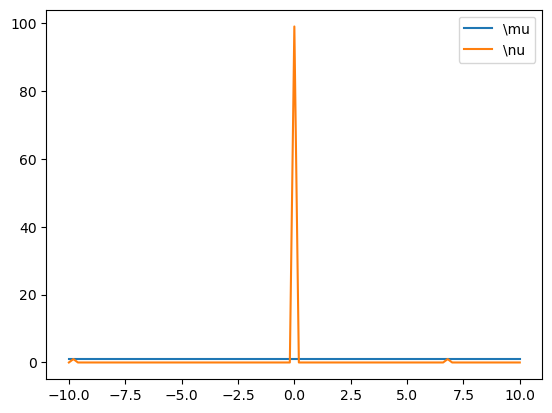

In [7]:
mu = np.ones_like(x)
nu = push_forward(mu, iopt2)

print(iopt2)
print(x[iopt2])

plt.plot(x, mu, label=r'\mu')
plt.plot(x, nu, label=r'\nu')
plt.legend()

$iopt2$の値, $x[iopt2]$から, ほぼ全ての$\mu$がopt = 50, (x座標 = 0)となる$\nu$へtransportしている.

[ 1 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 84]
[-9.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   6.8]
[-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -

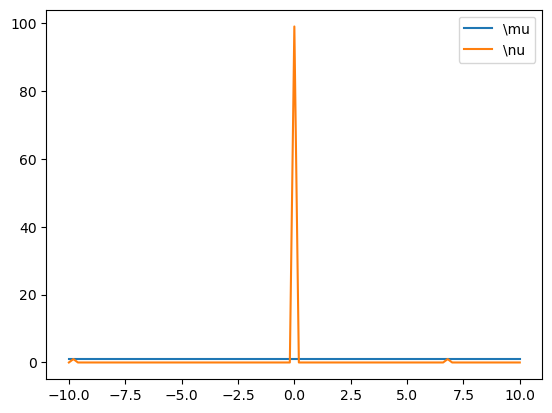

In [20]:
mu = np.ones_like(x)
nu = push_forward(mu, iopt2)

print(iopt2)
print(x[iopt2])                                                #T_{\phi}(x) = x[iopt2]
print(x[:-1] - (phi_cc[1:] - phi_cc[:-1]) / (x[1:] - x[:-1]))  #T_{\phi}(x) = x - (\nabla h)^{-1}(\nabla \phi^c(x))
plt.plot(x, mu, label=r'\mu')
plt.plot(x, nu, label=r'\nu')
plt.legend()

なめらかにするlap_solve

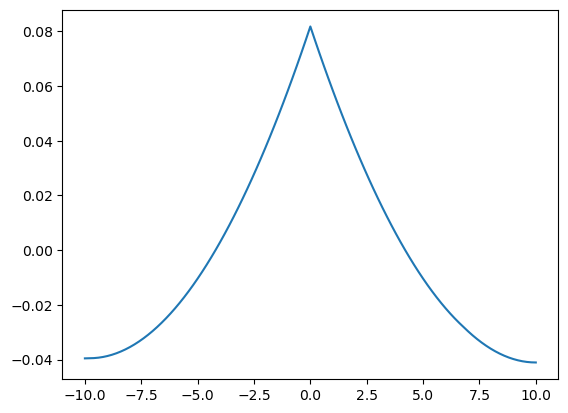

In [8]:
plt.plot(x, lap_solve(nu - mu))

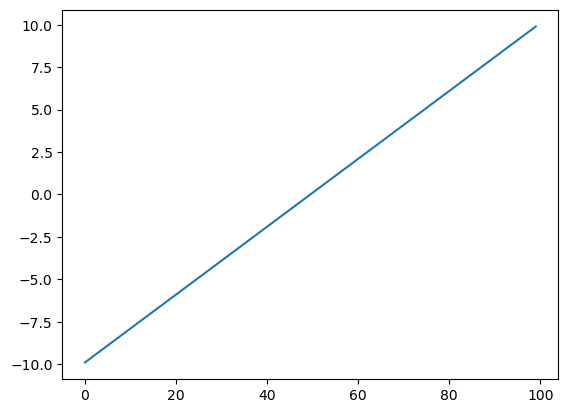

In [21]:
plt.plot((y[1:] - y[:-1]) / (x[1:] - x[:-1]))   # y = \phi(x)の微分

### $T_{\phi}$のグラフ

\begin{align*}
    T_{\phi}(x) &= x - (\nabla h)^{-1}(\nabla \phi^c(x))\\
                &= x - \nabla \phi^c(x)
\end{align*}

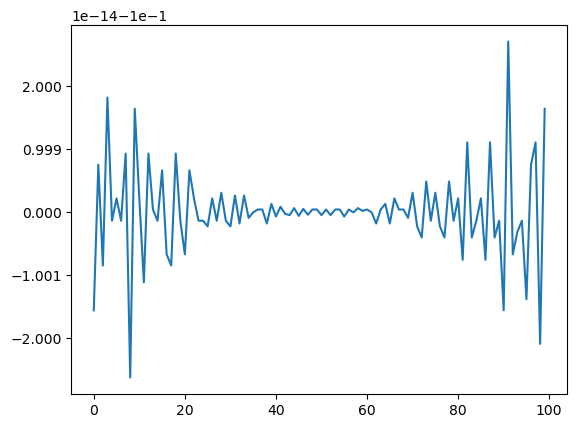

In [22]:
plt.plot(x[:-1] - (phi_cc[1:] - phi_cc[:-1]) / (x[1:] - x[:-1]))

### 2通りの$T_{\phi}$の比較

\begin{align*}
    T_{\phi}(x) &= x - (\nabla h)^{-1}(\nabla \phi^c(x))\\
                &= x[iopt2]
\end{align*}

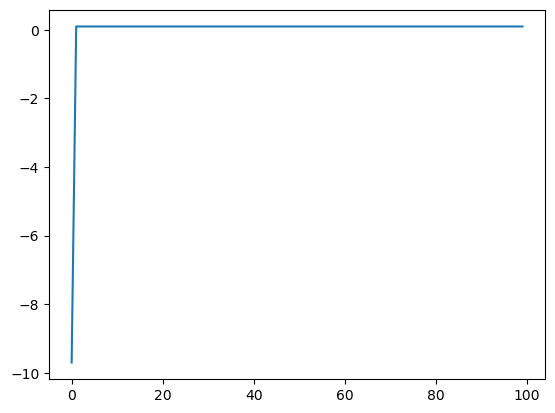

In [23]:
plt.plot(x[iopt2][:-1] - (x[:-1] - (phi_cc[1:] - phi_cc[:-1]) / (x[1:] - x[:-1])))